In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Simple linear regression.csv')

In [ ]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [ ]:
df.tail()

,SAT,GPA
95,1934,3.54
96,1861,3.58
97,1931,3.58
98,1933,3.59
99,1778,3.59


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     100 non-null    int64  
 1   GPA     100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [ ]:
x=df['SAT']
y=df['GPA']

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
len(x_train)

80

In [ ]:
len(x_test)

20

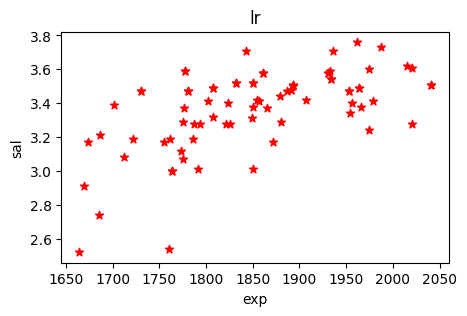

In [ ]:
plt.figure(figsize=(5,3))
plt.title('lr')
plt.xlabel('exp')
plt.ylabel('sal')
plt.scatter(x=x_train,y=y_train,color='r',marker='*')
plt.show()

In [ ]:
training_data=pd.DataFrame({'x_train':x_train,'y_train':y_train})
testing_data=pd.DataFrame({'x_test':x_test,'y_test':y_test})

In [ ]:
training_data

,x_train,y_train
55,1887,3.47
88,1964,3.49
26,1787,3.28
42,1966,3.38
69,1931,3.58
...,...,...
60,1964,3.49
71,1778,3.59
14,1773,3.12
92,1893,3.51


In [ ]:
testing_data

,x_test,y_test
83,2050,3.81
53,1634,3.42
70,1933,3.59
45,1925,3.40
44,1990,3.39
39,1831,3.37
22,1663,3.20
80,1810,3.71
10,1735,3.02
0,1714,2.40


In [ ]:
x_train=x_train.values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.00148288])

In [ ]:
model.intercept_

np.float64(0.6222219309814476)

In [ ]:
ans_train=model.predict(x_train)
ans_train

array([3.42041067, 3.53459219, 3.27212298, 3.53755794, 3.48565725,
       3.39816751, 3.38778737, 3.38185587, 3.36554422, 3.55090383,
       3.25432845, 3.52272917, 3.51828054, 3.6176333 , 3.33885244,
       3.09862638, 3.36554422, 3.33885244, 3.36406134, 3.22467091,
       3.55683534, 3.41003053, 3.23801681, 3.49010588, 3.32254079,
       3.2706401 , 3.56869836, 3.32995517, 3.42930793, 3.16090721,
       3.54942096, 3.12086953, 3.10455788, 3.25729421, 3.27953736,
       3.35516408, 3.23801681, 3.42930793, 3.30326339, 3.30326339,
       3.18759899, 3.25877708, 3.40854765, 3.14607844, 3.29436613,
       3.49010588, 3.32698942, 3.38185587, 3.30326339, 3.48565725,
       3.49307164, 3.36554422, 3.26322571, 3.37592436, 3.488623  ,
       3.51828054, 3.61021891, 3.25432845, 3.36554422, 3.42634217,
       3.64877371, 3.18759899, 3.51976342, 3.28250311, 3.08972911,
       3.4500682 , 3.17573598, 3.2320853 , 3.12383528, 3.42634217,
       3.64877371, 3.61911617, 3.26322571, 3.53162643, 3.23356

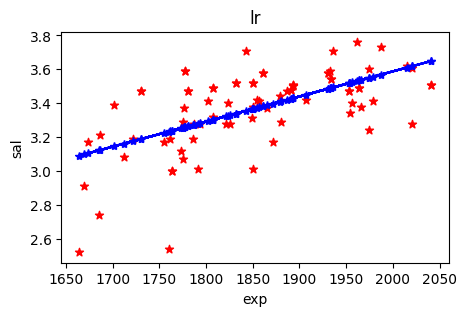

In [ ]:
plt.figure(figsize=(5,3))
plt.title('lr')
plt.xlabel('exp')
plt.ylabel('sal')
plt.scatter(x=x_train,y=y_train,color='r',marker='*')
plt.plot(x_train,ans_train,color='b',marker='*')
plt.show()

In [ ]:
training_data['train_ans']=ans_train

In [ ]:
training_data

,x_train,y_train,train_ans
55,1887,3.47,3.420411
88,1964,3.49,3.534592
26,1787,3.28,3.272123
42,1966,3.38,3.537558
69,1931,3.58,3.485657
...,...,...,...
60,1964,3.49,3.534592
71,1778,3.59,3.258777
14,1773,3.12,3.251363
92,1893,3.51,3.429308


In [ ]:
s=0
for i in training_data.index:
  s=s+(training_data['y_train'][i]-training_data['train_ans'][i])**2
print(f'mse {s/len(training_data)}')

mse 0.0367423039964676


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,ans_train)

0.0367423039964676

In [ ]:
s=0
for i in training_data.index:
  s=s+(training_data['y_train'][i]-training_data['train_ans'][i])**2
print(f'rmse {np.sqrt(s/len(training_data))}')

rmse 0.19168282133897027


In [ ]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_train,ans_train)

0.19168282133897027

In [ ]:
n=0
d=0
for i in training_data.index:
  n=n+(training_data['y_train'][i]-training_data['train_ans'][i])**2
  d=d+(training_data['y_train'][i]-training_data['y_train'].mean())**2
print(f'acc {1-(n)/(d)}')

acc 0.35092797662025266


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train,ans_train)

0.3509279766202523

#testing data

In [ ]:
ans_test=model.predict(x_test.values.reshape(-1,1))
ans_test

array([3.6621196 , 3.04524281, 3.488623  , 3.47675999, 3.57314699,
       3.33736956, 3.08824624, 3.30622914, 3.19501338, 3.16387296,
       3.35368121, 3.24543119, 3.49010588, 3.37295861, 3.42930793,
       3.13273255, 3.58352713, 3.6176333 , 3.19501338, 3.49010588])

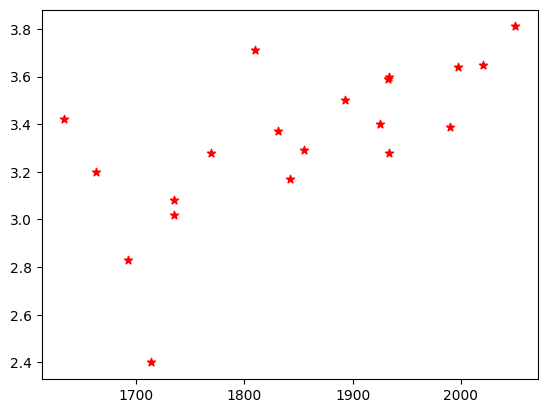

In [ ]:
plt.figure(figsize=(5,3))
plt.title('lr')
plt.xlabel('exp')
plt.ylabel('sal')
plt.scatter(x=x_test,y=y_test,color='r',marker='*')
plt.show()

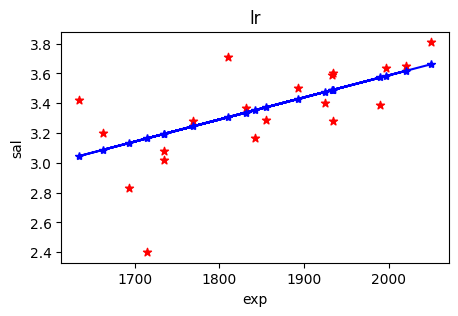

In [ ]:
plt.figure(figsize=(5,3))
plt.title('lr')
plt.xlabel('exp')
plt.ylabel('sal')
plt.scatter(x=x_test,y=y_test,color='r',marker='*')
plt.plot(x_test,ans_test,color='b',marker='*')
plt.show()

In [ ]:
testing_data['test_ans']=ans_test
testing_data

,x_test,y_test,test_ans
83,2050,3.81,3.662120
53,1634,3.42,3.045243
70,1933,3.59,3.488623
45,1925,3.40,3.476760
44,1990,3.39,3.573147
39,1831,3.37,3.337370
22,1663,3.20,3.088246
80,1810,3.71,3.306229
10,1735,3.02,3.195013
0,1714,2.40,3.163873


In [ ]:
s=0
for i in testing_data.index:
  s=s+(testing_data['y_test'][i]-testing_data['test_ans'][i])**2
print(f'mse {s/len(testing_data)}')

mse 0.06074431276064028


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,ans_test)

0.06074431276064028

In [ ]:
s=0
for i in testing_data.index:
  s=s+(testing_data['y_test'][i]-testing_data['test_ans'][i])**2
print(f'rmse {np.sqrt(s/len(testing_data))}')

rmse 0.24646361346178522


In [ ]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test,ans_test)

0.24646361346178522

In [ ]:
n=0
d=0
for i in testing_data.index:
  n=n+(testing_data['y_test'][i]-testing_data['test_ans'][i])**2
  d=d+(testing_data['y_test'][i]-testing_data['y_test'].mean())**2
print(f'acc {1-(n)/(d)}')

acc 0.41688865120062324


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,ans_test)

0.41688865120062324